# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
lats=[]
lngs=[]
city_names=[]
cloudiness=[]
countries=[]
dates=[]
humidity=[]
max_temp=[]
speed=[]

record_no=0
set_no =0

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + "Los Angeles").json()
response
for city in cities:
    print(f"Processing Record {record_no} of Set {set_no} | {city}")
    record_no+=1
    if record_no%50==0:
        set_no +=1
        record_no =0
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response['name'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        speed.append(response['wind']['speed'])
    except KeyError:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Processing Record 0 of Set 0 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 0 | punta arenas
Processing Record 2 of Set 0 | madimba
Processing Record 3 of Set 0 | okhotsk
Processing Record 4 of Set 0 | bluff
Processing Record 5 of Set 0 | tasiilaq
Processing Record 6 of Set 0 | langarud
Processing Record 7 of Set 0 | rikitea
Processing Record 8 of Set 0 | pevek
Processing Record 9 of Set 0 | yurginskoye
Processing Record 10 of Set 0 | nanortalik
Processing Record 11 of Set 0 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 0 | sawankhalok
Processing Record 13 of Set 0 | maraa
Processing Record 14 of Set 0 | albany
Processing Record 15 of Set 0 | cape town
Processing Record 16 of Set 0 | qaanaaq
Processing Record 17 of Set 0 | mataura
Processing Record 18 of Set 0 | nguiu
City not found. Skipping...
Processing Record 19 of Set 0 | bethel
Processing Record 20 of Set 0 | leh
Processing Record 21 of Set 0 | avarua
Processing Record 22 

City not found. Skipping...
Processing Record 35 of Set 3 | namatanai
Processing Record 36 of Set 3 | fortuna
Processing Record 37 of Set 3 | nocupetaro
Processing Record 38 of Set 3 | dharur
Processing Record 39 of Set 3 | ixtapa
Processing Record 40 of Set 3 | talnakh
Processing Record 41 of Set 3 | palasa
City not found. Skipping...
Processing Record 42 of Set 3 | leninsk
Processing Record 43 of Set 3 | victoria
Processing Record 44 of Set 3 | tabialan
City not found. Skipping...
Processing Record 45 of Set 3 | turukhansk
Processing Record 46 of Set 3 | touros
Processing Record 47 of Set 3 | klaksvik
Processing Record 48 of Set 3 | svetlogorsk
Processing Record 49 of Set 3 | skibbereen
Processing Record 0 of Set 4 | sitka
Processing Record 1 of Set 4 | laguna
Processing Record 2 of Set 4 | snezhnogorsk
Processing Record 3 of Set 4 | caravelas
Processing Record 4 of Set 4 | luderitz
Processing Record 5 of Set 4 | tuttlingen
Processing Record 6 of Set 4 | kudat
Processing Record 7 of 

Processing Record 25 of Set 7 | acapulco
Processing Record 26 of Set 7 | manokwari
Processing Record 27 of Set 7 | shchelyayur
City not found. Skipping...
Processing Record 28 of Set 7 | moree
Processing Record 29 of Set 7 | buariki
City not found. Skipping...
Processing Record 30 of Set 7 | dali
Processing Record 31 of Set 7 | la ronge
Processing Record 32 of Set 7 | christchurch
Processing Record 33 of Set 7 | krasnooktyabrskiy
Processing Record 34 of Set 7 | saint anthony
Processing Record 35 of Set 7 | kargasok
Processing Record 36 of Set 7 | tabuk
Processing Record 37 of Set 7 | sakakah
City not found. Skipping...
Processing Record 38 of Set 7 | kutum
Processing Record 39 of Set 7 | road town
Processing Record 40 of Set 7 | comodoro rivadavia
Processing Record 41 of Set 7 | solano
Processing Record 42 of Set 7 | leningradskiy
Processing Record 43 of Set 7 | dubti
Processing Record 44 of Set 7 | tilichiki
Processing Record 45 of Set 7 | melfi
Processing Record 46 of Set 7 | plauen


Processing Record 8 of Set 11 | tadine
Processing Record 9 of Set 11 | bom jardim
Processing Record 10 of Set 11 | harper
Processing Record 11 of Set 11 | qitaihe
Processing Record 12 of Set 11 | zhangjiakou
Processing Record 13 of Set 11 | boralday
Processing Record 14 of Set 11 | pemberton
Processing Record 15 of Set 11 | dunedin
Processing Record 16 of Set 11 | port hedland
Processing Record 17 of Set 11 | lima
Processing Record 18 of Set 11 | gat
Processing Record 19 of Set 11 | san jose
Processing Record 20 of Set 11 | bachaquero
Processing Record 21 of Set 11 | danielskuil
Processing Record 22 of Set 11 | magadan
Processing Record 23 of Set 11 | baruun-urt
Processing Record 24 of Set 11 | batagay
Processing Record 25 of Set 11 | makakilo city
Processing Record 26 of Set 11 | vangaindrano
Processing Record 27 of Set 11 | kahului
Processing Record 28 of Set 11 | eldikan
City not found. Skipping...
Processing Record 29 of Set 11 | aksarka
Processing Record 30 of Set 11 | vikindu
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_dict = {
    "City": city_names,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidity,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temp,
    "Wind Speed": speed}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, sep=',', encoding='utf-8')
weather_data.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [47]:
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1547715600,61,-53.16,-70.91,9.00,10.30
1,Madimba,40,CM,1547712000,69,4.42,9.93,28.00,2.10
2,Okhotsk,20,RU,1547716558,100,59.36,143.24,-22.82,3.49
3,Bluff,0,AU,1547716558,31,-23.58,149.07,31.31,4.81
4,Tasiilaq,92,GL,1547715000,72,65.61,-37.64,-8.00,11.30
5,Langarud,90,IR,1547715600,100,37.20,50.15,10.00,4.10
6,Rikitea,68,PF,1547716559,96,-23.12,-134.97,26.99,4.36
7,Pevek,44,RU,1547716559,88,69.70,170.27,-21.32,5.51
8,Yurginskoye,44,RU,1547716560,88,56.82,67.39,-8.72,3.91
9,Nanortalik,0,GL,1547716560,92,60.14,-45.24,-4.02,3.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

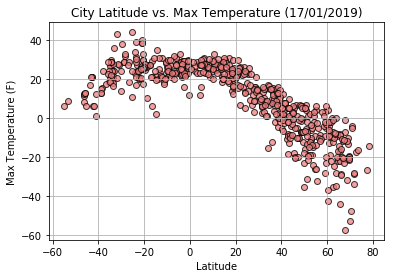

In [48]:
plt.scatter(lats, max_temp, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature ("+time.strftime("%d/%m/%Y")+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/CityLatitudeVsMaxTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

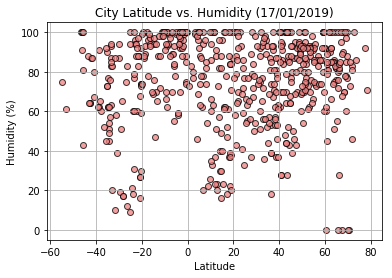

In [49]:
plt.scatter(lats, humidity, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity ("+time.strftime("%d/%m/%Y")+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/CityLatitudeVsHumidity.png")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

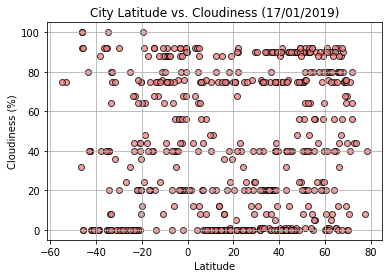

In [50]:
plt.scatter(lats, cloudiness, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness ("+time.strftime("%d/%m/%Y")+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/CityLatitudeVsCloudiness.png")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

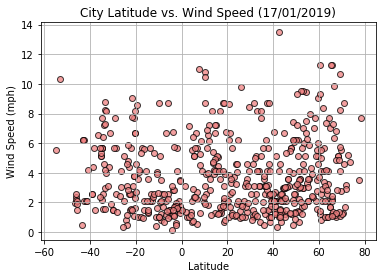

In [51]:
plt.scatter(lats, speed, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed ("+time.strftime("%d/%m/%Y")+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/CityLatitudeVsWindSpeed.png")
plt.grid(True)
plt.show()